# Unit 5 - Financial Planning


In [16]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [18]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3
# YOUR CODE HERE!

In [19]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [20]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!]
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = BTC * btc_price
my_eth_value = ETH * eth_price

#print(eth_response)
# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $18749.18
The current value of your 5.3 ETH is $2565.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Current amount of shares
# YOUR CODE HERE!

AGG = 200
SPY = 50 

In [22]:
# Set Alpaca API key and secret
alpaca_API_key = os.getenv("Alpaca_key")
alpaca_secret_key = os.getenv("Alpaca_secret_key")

# YOUR CODE HERE!

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_API_key,alpaca_secret_key,api_version ="v2")

In [23]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-14").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
inv = alpaca.get_barset(tickers,timeframe,start=today).df
# Preview DataFrame
# YOUR CODE HERE!
inv.tail()

AGG                                       \
                             open      high      low    close   volume   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.985  118.040  3295967   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.960  117.970  4988612   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.880  117.880  3589312   
2020-10-19 00:00:00-04:00  117.81  117.8600  117.720  117.787  3895071   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.580  117.640  3624855   

                              SPY                                    
                             open    high     low   close    volume  
2020-10-14 00:00:00-04:00  350.75  351.93  347.14  347.97  47281475  
2020-10-15 00:00:00-04:00  343.71  348.02  343.13  347.51  50665477  
2020-10-16 00:00:00-04:00  348.96  350.75  347.10  347.25  62467863  
2020-10-19 00:00:00-04:00  348.62  349.33  341.04  342.02  51690440  
2020-10-20 00:00:00-04:00  343.46  346.88  342.64  343.34  48206853

In [24]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = inv["AGG"]["close"][-1]
spy_close_price = inv["SPY"]["close"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [25]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = AGG * agg_close_price
my_spy_value = SPY*spy_close_price

# Print current value of share
print(f"The current value of your {SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {AGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [26]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
savings = [my_agg_value + my_spy_value, my_btc_value + my_eth_value]
df_savings = pd.DataFrame(savings, columns = ["amount"], index = ["shares" , "crypto"]) 
# Display savings DataFrame
display(df_savings)

,amount
shares,40695.000000
crypto,21314.929506


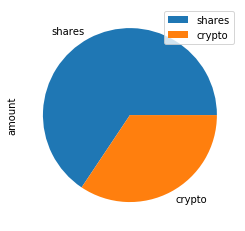

In [27]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount")

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum()
# Validate saving health
# YOUR CODE HERE!
if float(total_savings)>(emergency_fund):
    print(f" You have enough savings")
else:
    print(f"Save more money")

 You have enough savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date , end = end_date).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc30 = MCSimulation(portfolio_data = df_stock_data, weights = [.4,.6] , num_simulation = 500, num_trading_days = 252*30)

In [33]:
# Printing the simulation input data
# YOUR CODE HERE!
mc30.portfolio_data

AGG                                           \
                             open      high       low    close      volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173.0   
...                           ...       ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420.0   

                                             SPY                          \
                          daily_return      open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.1600  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.2800  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.9800  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.1100  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.7300  209.55  208.01  208.63   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245  
...                              ...          ...  
2020-08-03 00:00:00-04:00   71741125     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72846458     0.006151  
2020-08-06 00:00:00-04:00   76900649     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[1260 rows x 12 columns]

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999494,1.008220,1.000776,1.011750,1.004952,1.004180,1.004543,0.982159,0.999519,0.992138,...,0.990302,0.993185,1.004064,1.002658,1.020943,1.017036,1.003328,0.997250,1.007918,0.991587
2,0.996889,0.998216,1.011316,1.015524,0.988485,1.007247,1.003830,0.978933,1.004575,1.001734,...,0.990390,0.999041,1.009717,1.003231,1.011568,1.004497,0.996709,0.990932,1.020502,0.991067
3,1.012246,1.000159,1.010962,1.016505,0.984429,1.013420,1.004330,0.987380,1.000662,1.008790,...,0.998990,1.000570,1.000848,1.000693,1.016930,1.014965,1.014573,0.986259,1.025444,0.994401
4,1.015146,0.983030,1.003025,1.023775,0.983774,1.006717,0.985014,0.990770,1.008702,1.007039,...,0.999761,1.009224,0.995155,1.002037,1.008976,1.017552,1.016681,0.992582,1.020600,1.005796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.289643,5.693024,17.996198,13.888868,2.162366,4.686705,3.647560,10.175972,11.955528,3.046099,...,10.244042,11.620940,15.039789,5.496576,9.215160,16.758560,2.055260,9.319188,6.402480,3.177054
7557,5.276745,5.762939,17.997288,13.818607,2.186246,4.713399,3.683055,10.189886,11.821204,3.066815,...,10.300259,11.727274,15.092744,5.499233,9.240690,16.659250,2.047357,9.311632,6.413340,3.208678
7558,5.295536,5.828375,17.954043,13.791356,2.204449,4.695263,3.712695,10.129744,11.941442,3.031465,...,10.309688,11.729409,15.102757,5.540125,9.349191,16.565101,2.007416,9.356990,6.424694,3.239286
7559,5.289329,5.788964,17.931877,13.911767,2.190247,4.620658,3.703423,10.285005,11.933944,3.009685,...,10.320842,11.784907,15.032742,5.549878,9.406175,16.610850,2.011950,9.319786,6.456777,3.296710


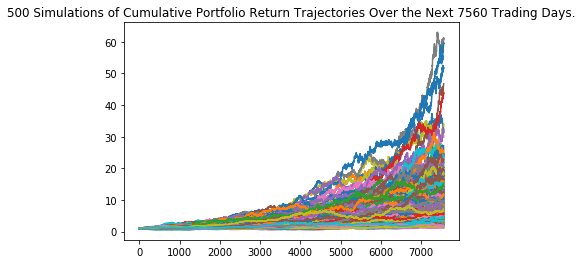

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc30.plot_simulation()

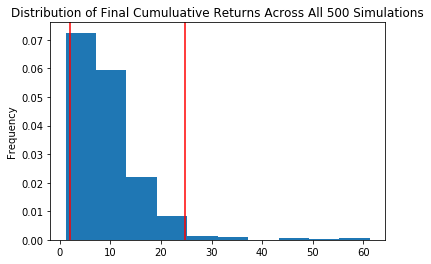

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc30.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = mc30.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary_stats.head()

count    500.000000
mean       9.637154
std        7.141207
min        1.160327
25%        5.035321
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = summary_stats[8] * initial_investment
ci_upper = summary_stats[9] * initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41004.219136606305 and $495116.23690925573


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = summary_stats[8] * initial_investment
ci_upper = summary_stats[9] * initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61506.32870490946 and $742674.3553638837


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")